In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,412.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,828.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1205.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,471.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,468.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
7665,36.0,2.0,116.0,464.0,1.0,0.0,0.0,0.0,30.0
7666,43.0,1.0,344.0,464.0,0.0,0.0,1.0,0.0,50.0
7667,58.0,2.0,94.0,408.0,0.0,0.0,1.0,0.0,75.0
7668,67.0,1.0,331.0,425.0,1.0,0.0,0.0,0.0,60.0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 2:3], y_train)

In [5]:
y_pred = sdt.predict(X_test[:, 2:3])

In [6]:
sdt.score(X_train[:, 2:3], y_train), sdt.score(X_test[:, 2:3], y_test)

(0.052955242356029664, 0.06553666037472228)

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sdt.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(1296.7384030377107, 1227.412109322659)

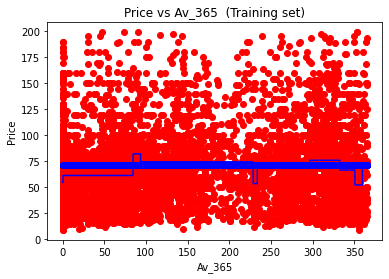

In [8]:
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

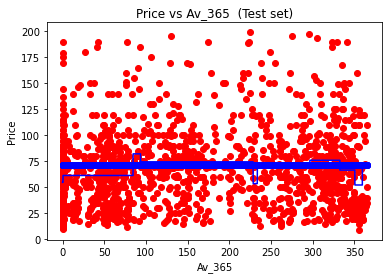

In [9]:
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [11]:
y_pred = dt.predict(X_test)

In [12]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9962003725770407, -0.8298113018471474)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(5.202629291612342, 2403.4464001158917)

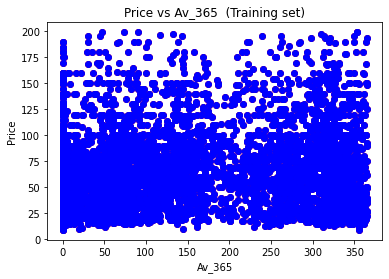

In [14]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], dt.predict(X_train), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

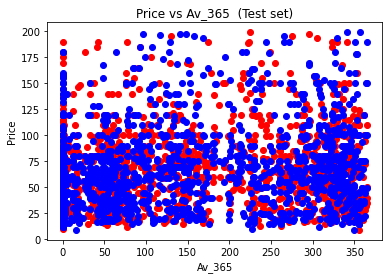

In [15]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], dt.predict(X_test), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [17]:
y_pred = rf.predict(X_test)

In [18]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8172518515760105, -0.0310028658203112)

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(250.22739446334705, 1354.2162100887442)

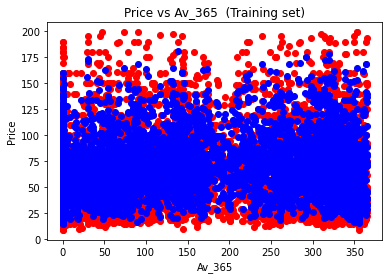

In [20]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rf.predict(X_train), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

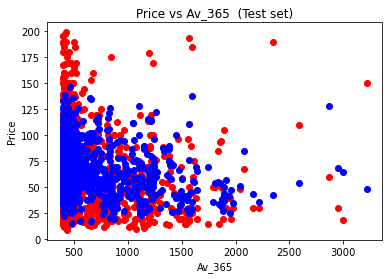

In [21]:
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rf.predict(X_test), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()